## Eploratory Data Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Because of the size of the CSV file (6 million rows), we will only be working with a smaller subsection of 500,000 rows of the data for our analysis.

In [2]:
file_name = "../data/raw/PS_20174392719_1491204439457_log.csv"
df_sample = pd.read_csv(file_name, nrows=500000)

In [7]:
df_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.0
mean,13.906728,1.663937e+05,9.116928e+05,9.314261e+05,9.827739e+05,1.162668e+06,0.000466,0.0
std,3.731891,2.725841e+05,3.016901e+06,3.054015e+06,2.336426e+06,2.510610e+06,0.021582,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.335032e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.137560e+04,1.856900e+04,0.000000e+00,1.192711e+05,2.221441e+05,0.000000,0.0
75%,17.000000,2.226441e+05,1.702941e+05,2.101716e+05,8.962267e+05,1.201403e+06,0.000000,0.0
max,20.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


Check to see if any of the data is missing, and see which are categorical vs quantitative.

In [8]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [9]:
df_sample.groupby("isFraud")[["isFlaggedFraud"]].value_counts()

isFraud  isFlaggedFraud
0        0                 499767
1        0                    233
Name: count, dtype: int64

All the columns with object data types (type, nameOrig, nameDest) are categorical and transaction type seems to be the only relevant column. All the numeric columns, except isFraud and isFlaggedFraud, are quantitative. While isFraud and isFlaggedFraud are filled with integer values, we see the columns are only populated by 0's and 1's making them boolean/categorical data.


Using the groupby function, we see that the "naive" model is entirely ineffective and never flags any activity as fraudulent.

## Univariate Analysis

### Quantitative Data

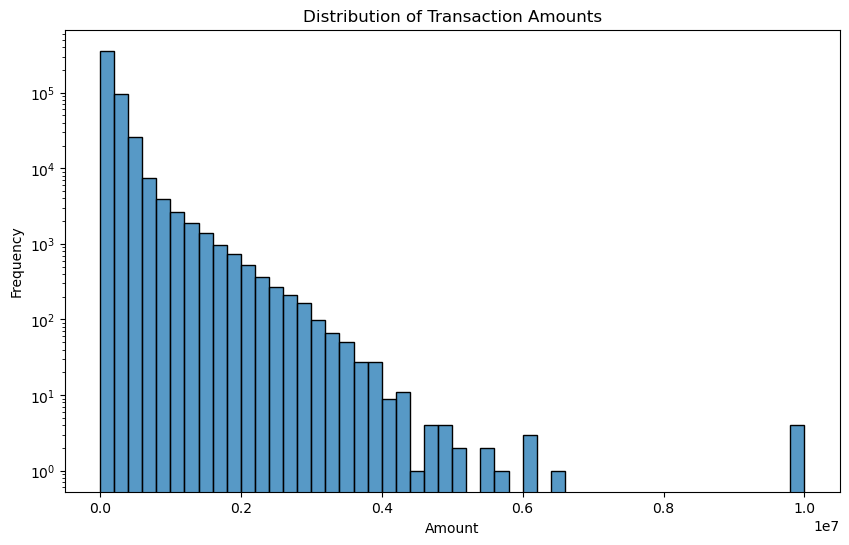

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["amount"], bins=50, kde=False)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()

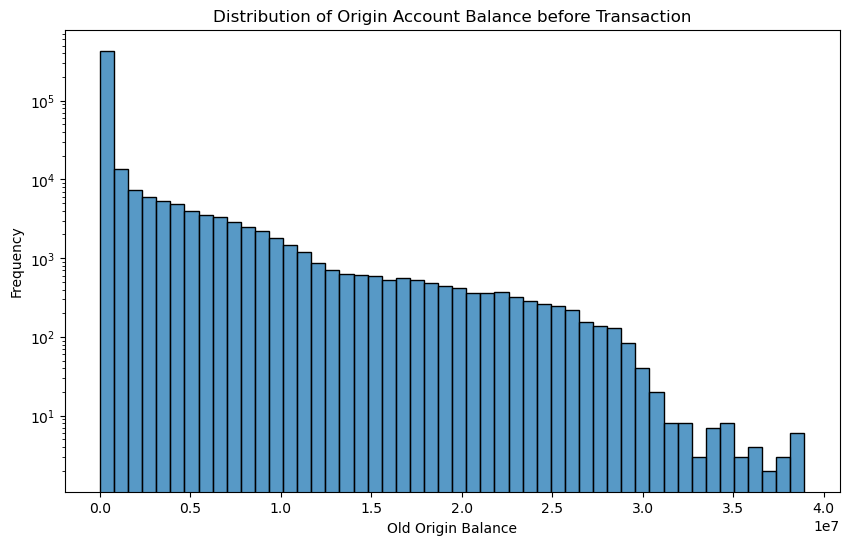

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["oldbalanceOrg"], bins=50, kde=False)
plt.title("Distribution of Origin Account Balance before Transaction")
plt.xlabel("Old Origin Balance")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()

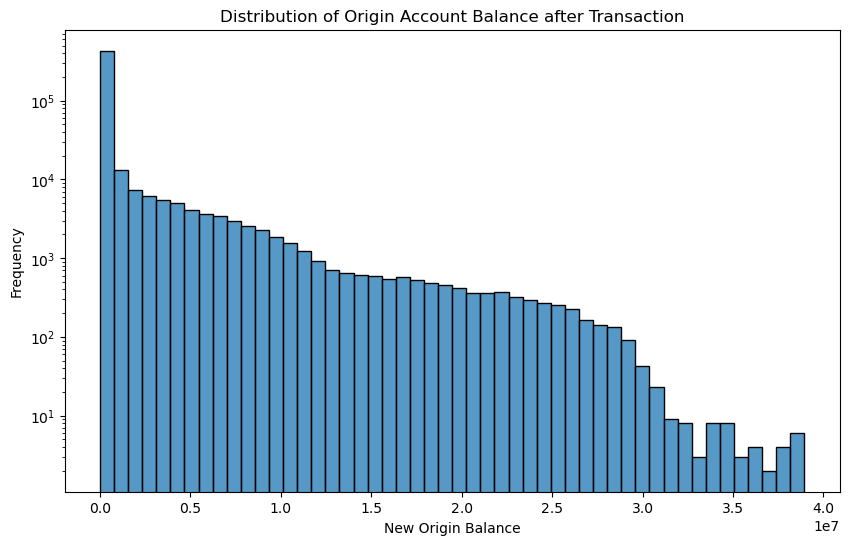

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["newbalanceOrig"], bins=50, kde=False)
plt.title("Distribution of Origin Account Balance after Transaction")
plt.xlabel("New Origin Balance")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()

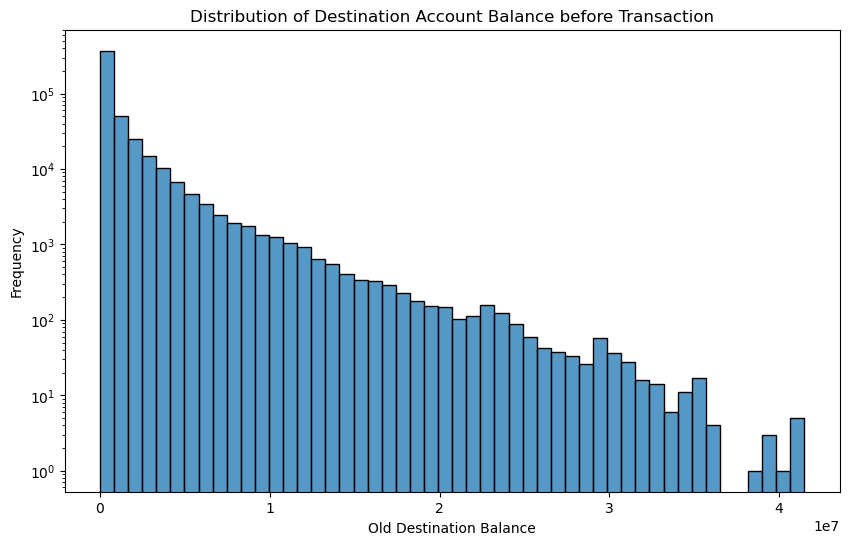

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["oldbalanceDest"], bins=50, kde=False)
plt.title("Distribution of Destination Account Balance before Transaction")
plt.xlabel("Old Destination Balance")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()

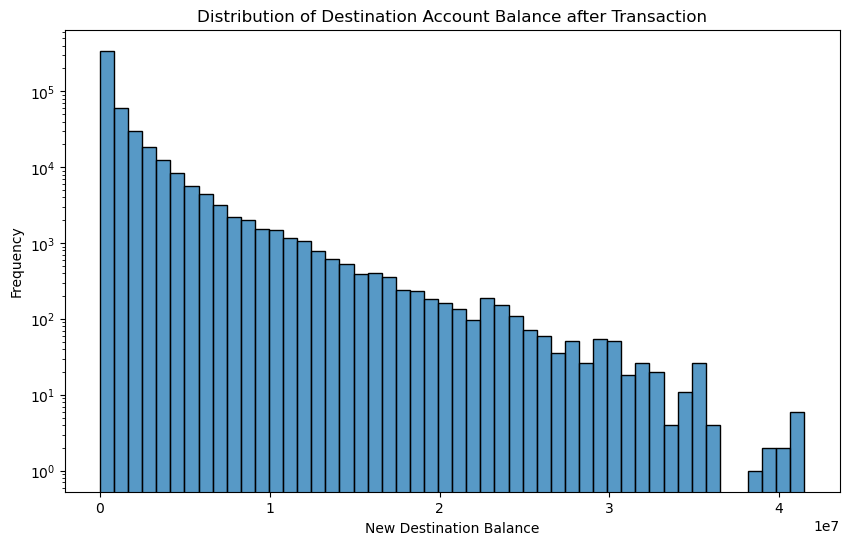

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["newbalanceDest"], bins=50, kde=False)
plt.title("Distribution of Destination Account Balance after Transaction")
plt.xlabel("New Destination Balance")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()

The hiistograms show that the data is right skewed, with the majority of balances and transactions being of a smaller amount of currency.

### Categorical Data

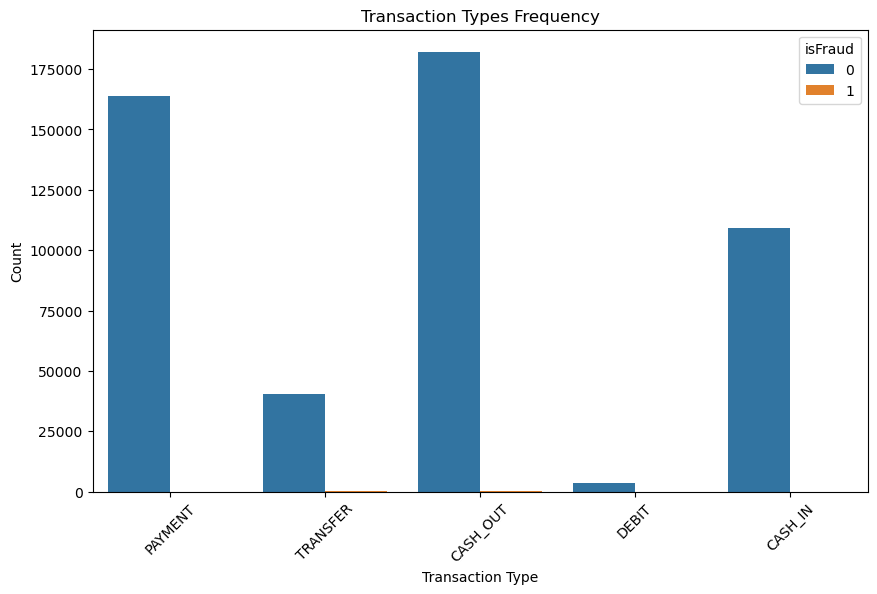

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x="type", data=df_sample, hue="isFraud")
plt.title("Transaction Types Frequency")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The amount of fraudulent transactions is very small and seems to only be present for tansfer and cash_out (withdrawal) activity, implying no fraudulent activity can occur for deposit, payment, or cash_in (debit) transactions.

Let's verify this with the groupby function.

In [23]:
df_sample.groupby("isFraud")[["type"]].value_counts()

isFraud  type    
0        CASH_OUT    182195
         PAYMENT     164032
         CASH_IN     109319
         TRANSFER     40618
         DEBIT         3603
1        CASH_OUT       121
         TRANSFER       112
Name: count, dtype: int64

Verifying the visualization didn't miss any data and knowing that the model doesn't mark anything as fraud, we don't need to do this or any visualization with the isFlaggedFraud column.

## Bivariate Analysis

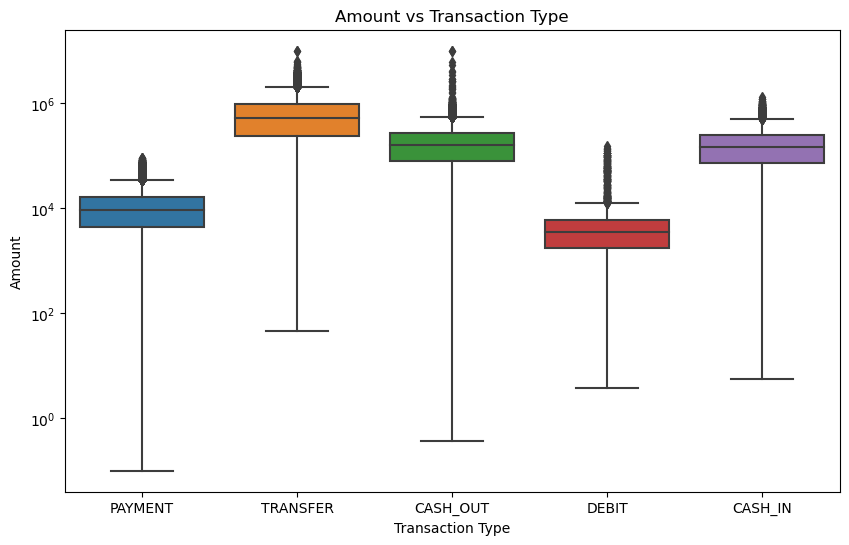

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="type", y="amount")
plt.title("Amount vs Transaction Type")
plt.xlabel("Transaction Type")
plt.yscale("log")
plt.ylabel("Amount")
plt.show()

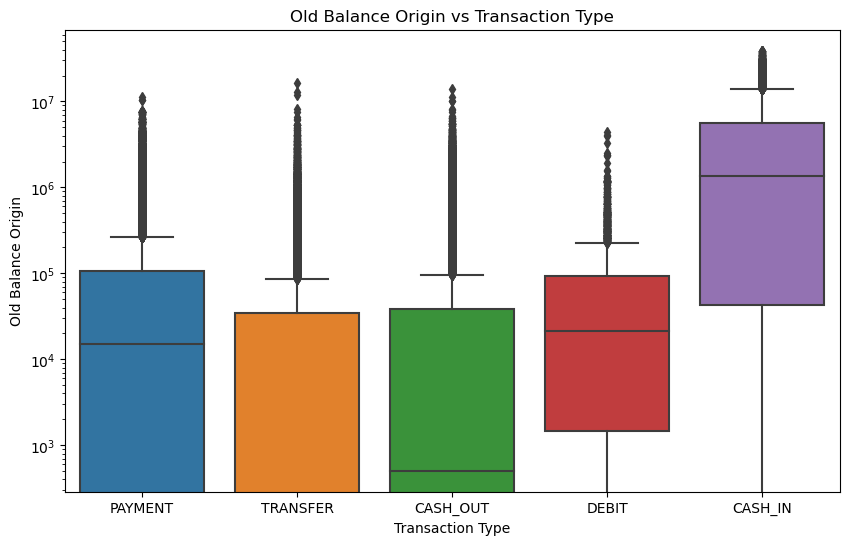

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="type", y="oldbalanceOrg")
plt.title("Old Balance Origin vs Transaction Type")
plt.xlabel("Transaction Type")
plt.yscale("log")
plt.ylabel("Old Balance Origin")
plt.show()

The visualization here looks weird, especially for payment, transfer, and cash_out. From running the describe method, we know the minimum and 1st IQR are 0, which seems to be reflected here with box plots extending down towards 0.

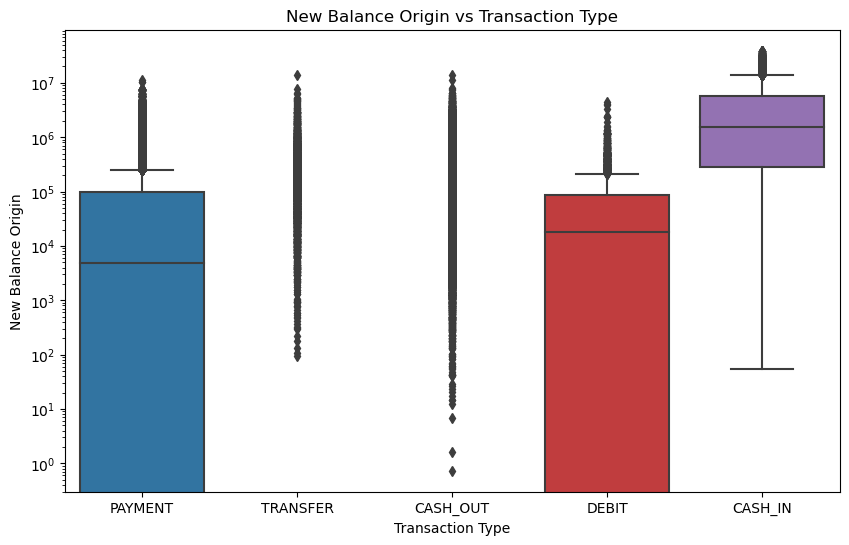

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="type", y="newbalanceOrig")
plt.title("New Balance Origin vs Transaction Type")
plt.xlabel("Transaction Type")
plt.yscale("log")
plt.ylabel("New Balance Origin")
plt.show()

The boxplots for transfer and cash_out appear to be made entirely of outliers, initially suggesting we might need to drop those rows. But since these are also the only transaction types with fraudulent transactions, we can't drop these rows and might instead drop newbalanceOrig.

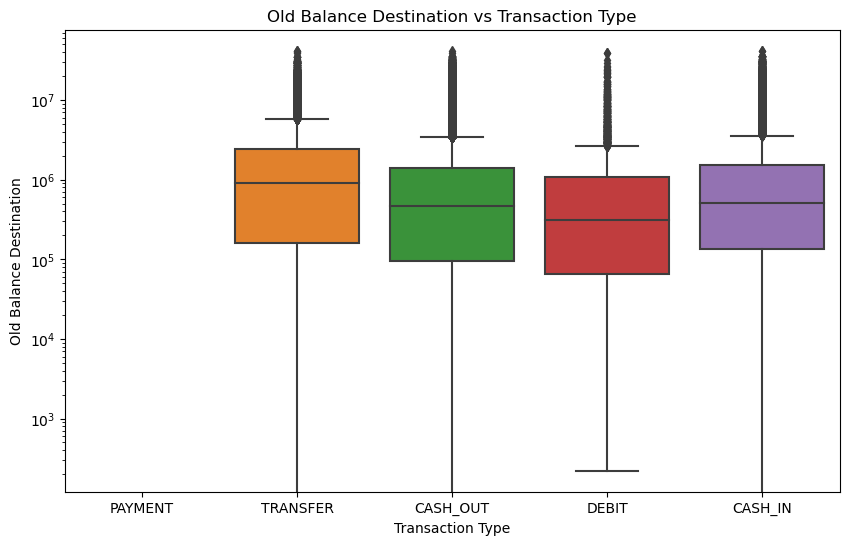

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="type", y="oldbalanceDest")
plt.title("Old Balance Destination vs Transaction Type")
plt.xlabel("Transaction Type")
plt.yscale("log")
plt.ylabel("Old Balance Destination")
plt.show()

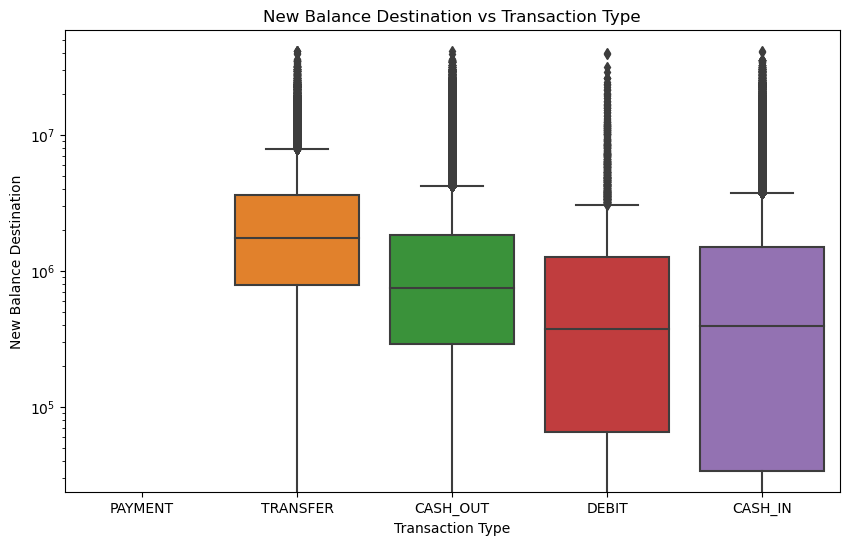

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="type", y="newbalanceDest")
plt.title("New Balance Destination vs Transaction Type")
plt.xlabel("Transaction Type")
plt.yscale("log")
plt.ylabel("New Balance Destination")
plt.show()

The payment transaction type seems to not have data for oldbalanceDest and newbalanceDest. Let's use groupby to verify.

In [70]:
print(df_sample.groupby(["type"])["oldbalanceDest"].value_counts()[["PAYMENT"]])
print(df_sample.groupby(["type"])["newbalanceDest"].value_counts()[["PAYMENT"]])

type     oldbalanceDest
PAYMENT  0.0               164032
Name: count, dtype: int64
type     newbalanceDest
PAYMENT  0.0               164032
Name: count, dtype: int64


There is data for the payment transaction type that doesn't show up in the visualization, and all of the values of oldbalanceDest and newbalanceDest for payment are 0.

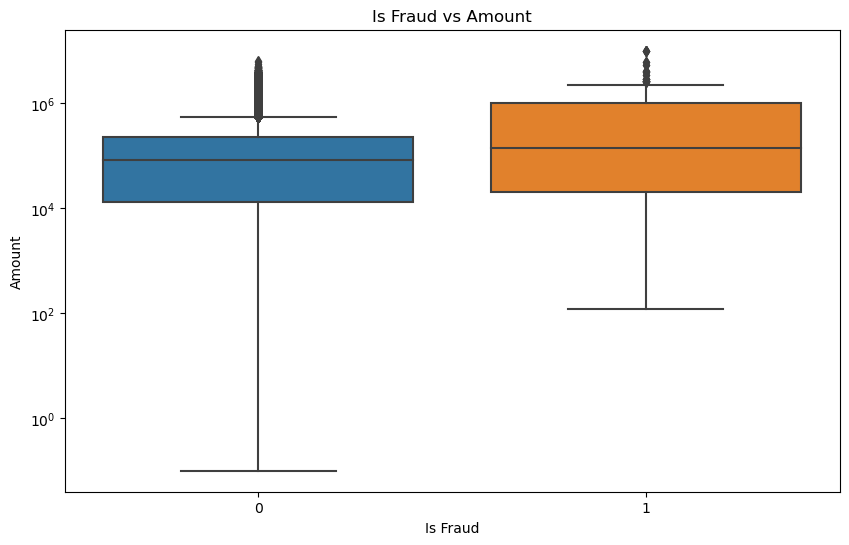

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="isFraud", y="amount")
plt.title("Is Fraud vs Amount")
plt.xlabel("Is Fraud")
plt.yscale("log")
plt.ylabel("Amount")
plt.show()

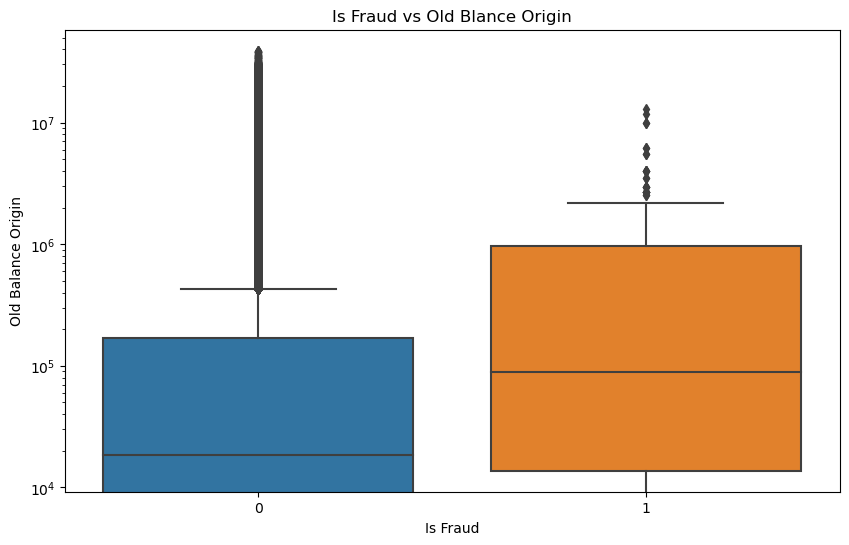

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="isFraud", y="oldbalanceOrg")
plt.title("Is Fraud vs Old Blance Origin")
plt.xlabel("Is Fraud")
plt.yscale("log")
plt.ylabel("Old Balance Origin")
plt.show()

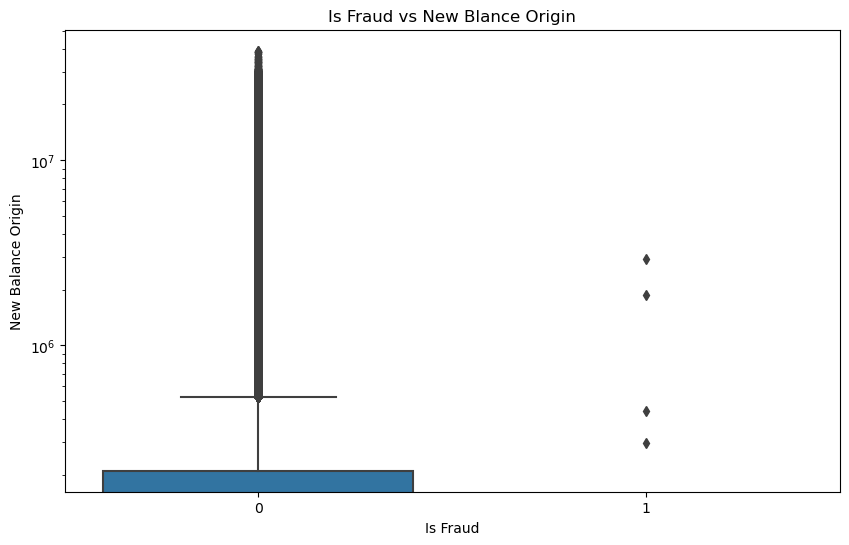

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="isFraud", y="newbalanceOrig")
plt.title("Is Fraud vs New Blance Origin")
plt.xlabel("Is Fraud")
plt.yscale("log")
plt.ylabel("New Balance Origin")
plt.show()

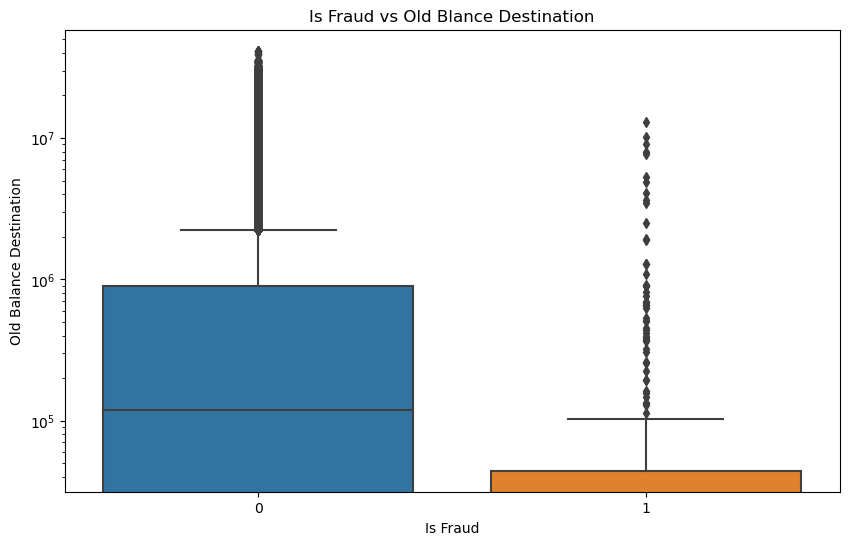

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="isFraud", y="oldbalanceDest")
plt.title("Is Fraud vs Old Blance Destination")
plt.xlabel("Is Fraud")
plt.yscale("log")
plt.ylabel("Old Balance Destination")
plt.show()

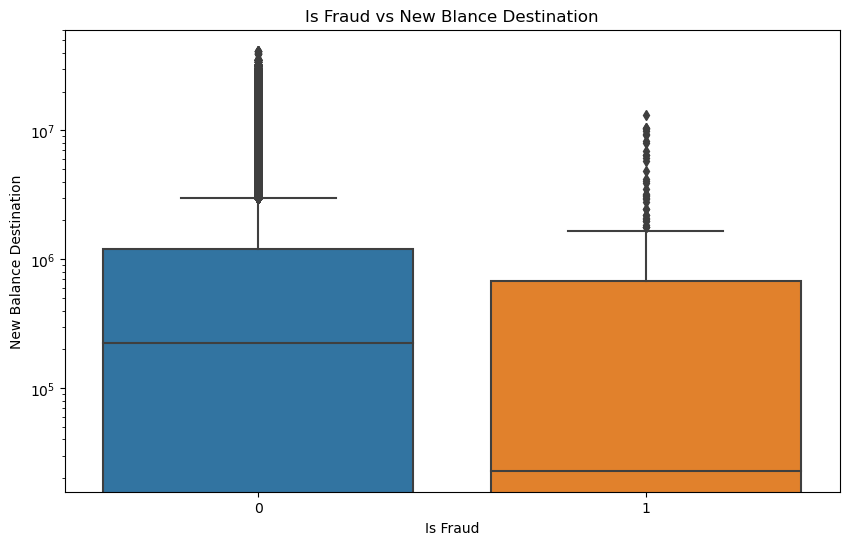

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x="isFraud", y="newbalanceDest")
plt.title("Is Fraud vs New Blance Destination")
plt.xlabel("Is Fraud")
plt.yscale("log")
plt.ylabel("New Balance Destination")
plt.show()

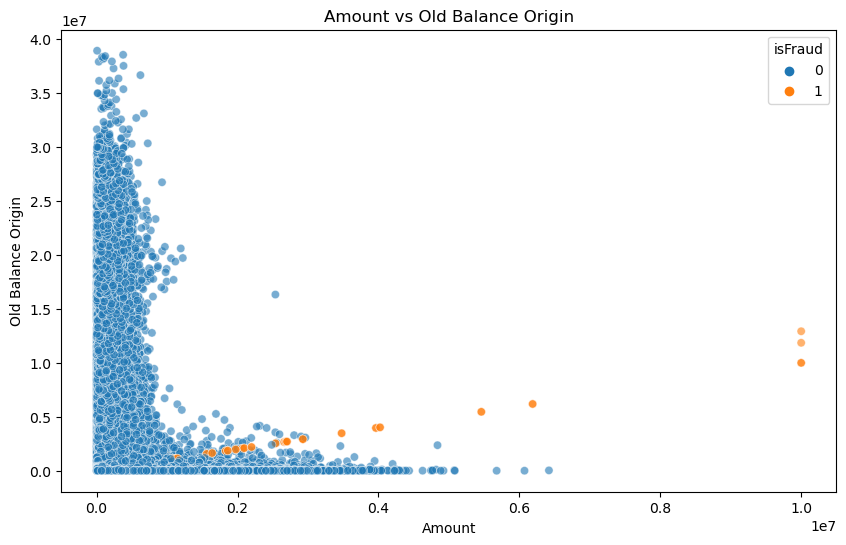

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="amount", y="oldbalanceOrg", hue="isFraud", data=df_sample, alpha=0.6)
plt.title("Amount vs Old Balance Origin")
plt.xlabel("Amount")
plt.ylabel("Old Balance Origin")
plt.show()

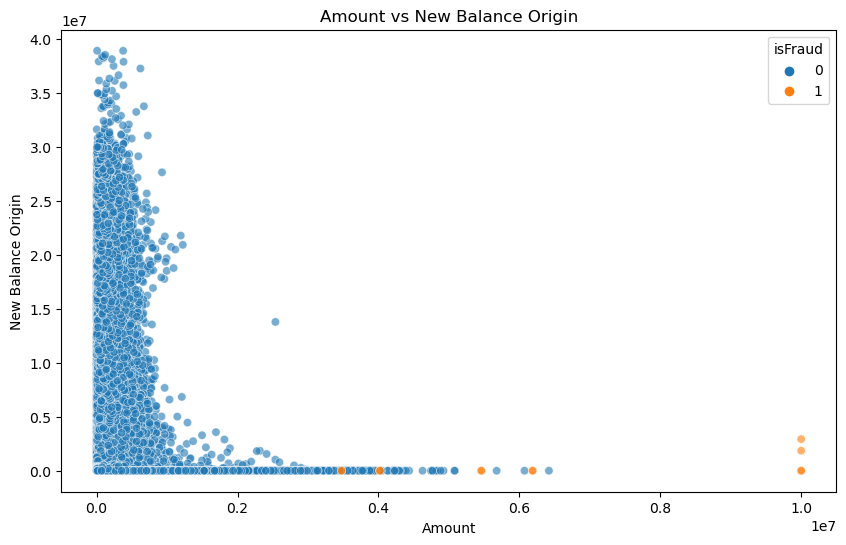

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="amount", y="newbalanceOrig", hue="isFraud", data=df_sample, alpha=0.6)
plt.title("Amount vs New Balance Origin")
plt.xlabel("Amount")
plt.ylabel("New Balance Origin")
plt.show()

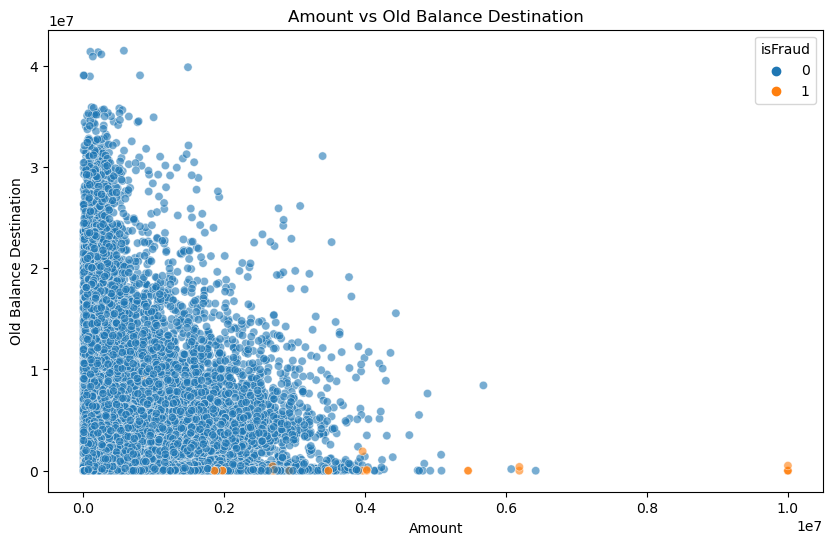

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="amount", y="oldbalanceDest", hue="isFraud", data=df_sample, alpha=0.6)
plt.title("Amount vs Old Balance Destination")
plt.xlabel("Amount")
plt.ylabel("Old Balance Destination")
plt.show()

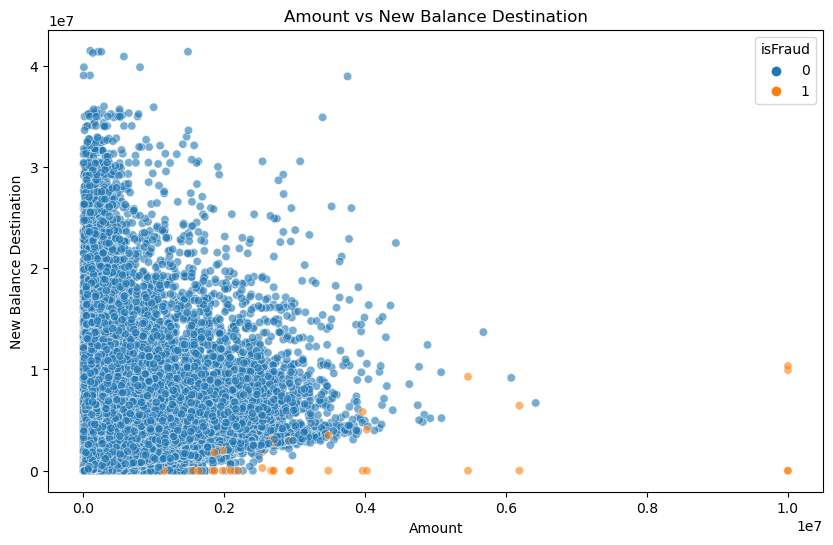

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="amount", y="newbalanceDest", hue="isFraud", data=df_sample, alpha=0.6)
plt.title("Amount vs New Balance Destination")
plt.xlabel("Amount")
plt.ylabel("New Balance Destination")
plt.show()

The scatterplots show that fraudulent transactions have a fairly strong, positive correlation using all of the predictor variables, with "amount" seeming like the best predictor, having the strongest correlation. 

Non-fraudulent transactions have very weak correlations.